In [49]:
#Necessary imports
import numpy
import pylab
import LightCurveSimulator
#We will be testing these fits on the lightcurve you know from the LightCurveSimu notebook.
lc = LightCurveSimulator.ShortTransit()
lc.add_noise(sn=500)
import scipy.optimize
from scipy import interpolate
from scipy.optimize import curve_fit
from scipy import stats

In [4]:
t, flux, error = lc.getdata()

flux = lc.getdata()[1]
time = lc.getdata()[0]
error =lc.getdata()[2]

In [22]:
def lightcurve_model(t, base_flux, transit_flux):
    y=numpy.ones(len(t))
    t_start = -0.05
    t_end = 0.05
    for i in range(0,len(t)):
        if (t[i] > t_start) and (t[i] < t_end):
            y[i] = transit_flux
        else: 
            y[i] = base_flux
    return y 

In [44]:
def lightcurve_model1(t, base_flux):
    y=numpy.ones(len(t))
    coeffs = numpy.polyfit(time,flux,deg=10)
    poly = numpy.poly1d(coeffs)
    t_start = -0.05
    t_end = 0.05
    
    for i in range(0,len(t)):
        if (t[i] > t_start) and (t[i] < t_end):
            y[i] = poly(t[i])
        else: 
            y[i] = base_flux
    return y 

In [66]:
def lightcurve_model2(t, base_flux, a):
    y=numpy.ones(len(t))

    t_start = -0.05
    t_end = 0.05
    t_mid = (t_start+t_end)/2
    standard_deviation = a
    
    for i in range(0,len(t)):
        if (t[i] > t_start) and (t[i] < t_end):
            y[i] = (scipy.stats.norm(t_mid, standard_deviation)).pdf(t[i])
        else: 
            y[i] = base_flux
    return y 

In [67]:
popt, pcov = curve_fit(lightcurve_model2, time, flux, sigma=None, p0=[1, 1])

In [68]:
popt

array([0.99944875, 0.40401779])

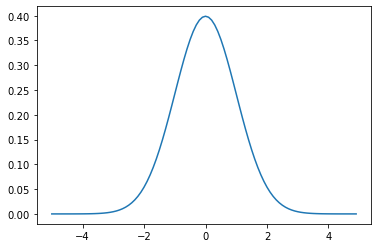

In [53]:
mean = 0
standard_deviation = 1

x_values = numpy.arange(-5, 5, 0.1)
y_values = scipy.stats.norm(mean, standard_deviation)

pylab.plot(x_values, y_values.pdf(x_values))

In [57]:
y_values.pdf(-5)

1.4867195147342979e-06

In [72]:
model_y3 = lightcurve_model2(time, 1,0.40401779)
#model_y3

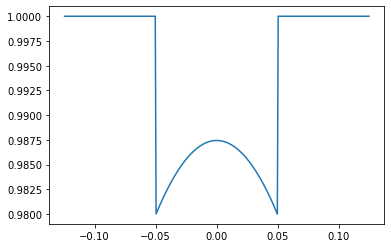

In [71]:
pylab.plot(time, model_y3)

In [23]:
popt, pcov = curve_fit(lightcurve_model, time, flux, sigma=None, p0=[1, 0.9])

In [24]:
popt

array([0.99944875, 0.98495086])

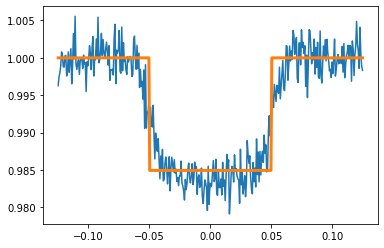

In [25]:
model_y = lightcurve_model(time, 1, 0.98495086)
pylab.plot(time, flux)
pylab.plot(time, model_y, lw='3')

In [29]:
popt

array([0.99944875, 0.9       ])

In [30]:
pcov

array([[inf, inf],
       [inf, inf]])

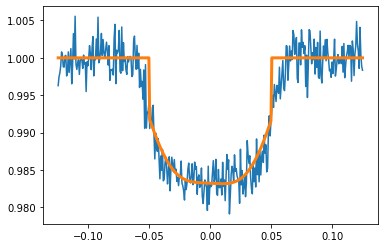

In [45]:
model_y = lightcurve_model1(time, 1)
pylab.plot(time, flux)
pylab.plot(time, model_y, lw='3')

In [37]:
min(model_y)

0.9831776378931737